In [358]:
import os
import re
import glob
import xlrd 
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
from scipy.special import erf
from math import pow
import math
import sys
from scipy import special
from scipy.linalg import eig
import matplotlib.ticker as ticker
import scipy.stats as stats
import pylab as pl


In [359]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rc('axes', linewidth=2)

In [360]:
df = pd.read_excel('cl_0_1_6_water_added_in_ice_saop.xlsx', skiprows=3)
df.head()



,Unnamed: 0,cl_1s_saop_0water_in_active,Unnamed: 2,Unnamed: 3,cl_2s_saop_0water_in_active,Unnamed: 5,Unnamed: 6,cl_2p_saop_0water_in_active,Unnamed: 8,Unnamed: 9,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,cl_1s_b3lyp_6water_in_active,Unnamed: 40,Unnamed: 41,cl_2s_b3lyp_6water_in_active,Unnamed: 43,Unnamed: 44,cl_2p_b3lyp_6water_in_active
0,NaN,2754.052521,NaN,NaN,243.511239,NaN,NaN,182.803498,NaN,NaN,...,NaN,NaN,NaN,2774.176416,NaN,NaN,250.985557,NaN,NaN,188.418229
1,NaN,2755.331438,NaN,NaN,244.790156,NaN,NaN,184.096021,NaN,NaN,...,NaN,NaN,NaN,2773.010425,NaN,NaN,249.775211,NaN,NaN,187.212047
2,NaN,2754.515108,NaN,NaN,243.946615,NaN,NaN,183.252479,NaN,NaN,...,NaN,NaN,NaN,2773.145391,NaN,NaN,249.919457,NaN,NaN,187.355204
3,NaN,2755.086539,NaN,NaN,244.518046,NaN,NaN,183.837516,NaN,NaN,...,NaN,NaN,NaN,2773.752741,NaN,NaN,250.518480,NaN,NaN,187.954540
4,NaN,2755.603548,NaN,NaN,245.035055,NaN,NaN,184.368131,NaN,NaN,...,NaN,NaN,NaN,2773.998184,NaN,NaN,250.775488,NaN,NaN,188.211684


mean_0water = 183.66608670000002
mean_1water = 183.696290916
mean_6water = 183.783094
std_0water = 0.4842640688417024
std_1water = 0.35116046159333864
std_6waters = 0.455294595113053


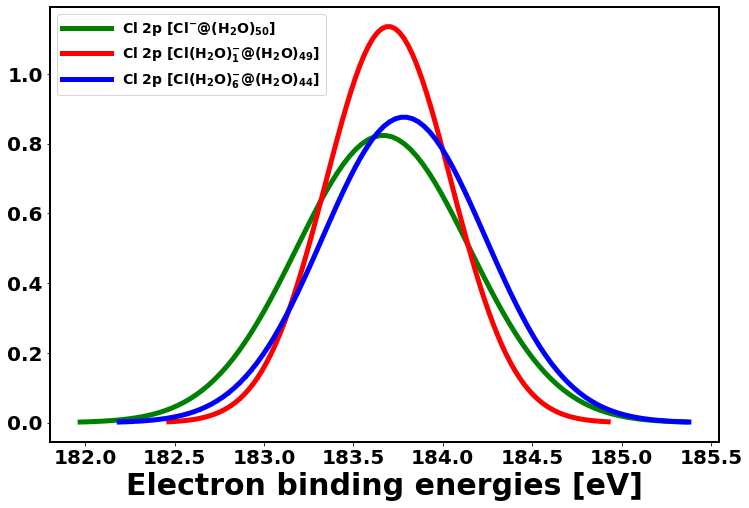

In [361]:
#Comparison between 0,1 and 6 water added to the activesystem and interacting with 50, 49, and 44 water molecules

cl_2p_saop_0water_in_active = df.cl_2p_saop_0water_in_active
cl_2p_saop_1water_in_active = df.cl_2p_saop_1water_in_active
cl_2p_saop_6water_in_active = df.cl_2p_saop_6water_in_active



zero_water_in_active_cl_2p = np.array(cl_2p_saop_0water_in_active)
one_water_in_active_cl_2p  = np.array(cl_2p_saop_1water_in_active)
six_water_in_active_cl_2p  = np.array(cl_2p_saop_6water_in_active)


mean_zero_water_in_active_cl_2p = np.mean(zero_water_in_active_cl_2p)
print("mean_0water =", mean_zero_water_in_active_cl_2p)
mean_one_water_in_active_cl_2p = np.mean(one_water_in_active_cl_2p)
print("mean_1water =", mean_one_water_in_active_cl_2p )
mean_six_water_in_active_cl_2p  = np.mean(six_water_in_active_cl_2p)
print("mean_6water =", mean_six_water_in_active_cl_2p )


std_zero_water_in_active_cl_2p = np.std(zero_water_in_active_cl_2p)
print("std_0water =", std_zero_water_in_active_cl_2p)
std_one_water_in_active_cl_2p  = np.std(one_water_in_active_cl_2p)
print("std_1water =", std_one_water_in_active_cl_2p)
std_six_water_in_active_cl_2p  = np.std(six_water_in_active_cl_2p )
print("std_6waters =", std_six_water_in_active_cl_2p)


zero_water_in_active_cl_2p_BE = np.linspace(mean_zero_water_in_active_cl_2p - 3.5*std_zero_water_in_active_cl_2p , mean_zero_water_in_active_cl_2p + 3.5*std_zero_water_in_active_cl_2p, 100)
one_water_in_active_cl_2p_BE = np.linspace(mean_one_water_in_active_cl_2p - 3.5*std_one_water_in_active_cl_2p, mean_one_water_in_active_cl_2p + 3.5*std_one_water_in_active_cl_2p, 100)
six_water_in_active_cl_2p_BE =  np.linspace(mean_six_water_in_active_cl_2p - 3.5*std_six_water_in_active_cl_2p, mean_six_water_in_active_cl_2p + 3.5*std_six_water_in_active_cl_2p, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(zero_water_in_active_cl_2p_BE, scipy.stats.norm.pdf(zero_water_in_active_cl_2p_BE, mean_zero_water_in_active_cl_2p, std_zero_water_in_active_cl_2p), color="green", marker='>', markersize=2, linestyle='solid',label='Cl 2p [Cl$^{-}$@(H$_{2}$O)$_{50}$]', linewidth=5)
plt.plot(one_water_in_active_cl_2p_BE, scipy.stats.norm.pdf(one_water_in_active_cl_2p_BE, mean_one_water_in_active_cl_2p, std_one_water_in_active_cl_2p),  color="red", marker='x', markersize=2, linestyle='solid',label='Cl 2p [Cl(H$_{2}$O)$^{-}_{1}$@(H$_{2}$O)$_{49}$]', linewidth=5)
plt.plot(six_water_in_active_cl_2p_BE, scipy.stats.norm.pdf(six_water_in_active_cl_2p_BE, mean_six_water_in_active_cl_2p, std_six_water_in_active_cl_2p), color="blue", marker='d', markersize=2, linestyle='solid',label='Cl 2p [Cl(H$_{2}$O)$^{-}_{6}$@(H$_{2}$O)$_{44}$]', linewidth=5)

#plt.ylim([0.1, 1.2])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('cl50_0_1_6_saop-2p.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()

mean_6water_pbe = 182.063301676
mean_6water_b3lyp = 187.810319824
mean_6water_saop = 183.783094
std_6water_pbe = 0.4209627179235856
std_6water_b3lyp = 0.42383783968514216
std_6waters_saop = 0.455294595113053


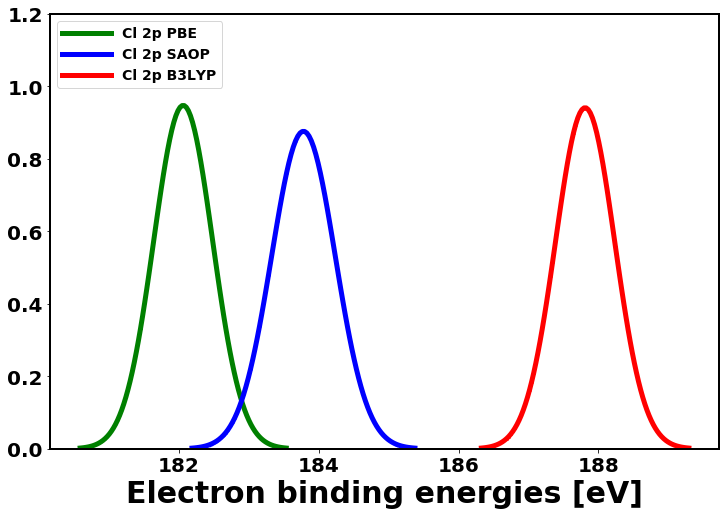

In [362]:
#Comparison between functionals (pbe, b3lyp and saop); 6 water added to the activesystem and interacting with 44 water molecules

cl_2p_pbe_6water_in_active = df.cl_2p_pbe_6water_in_active
cl_2p_b3lyp_6water_in_active = df.cl_2p_b3lyp_6water_in_active
cl_2p_saop_6water_in_active = df.cl_2p_saop_6water_in_active



six_cl_2p_pbe_6water_in_active = np.array(cl_2p_pbe_6water_in_active)
six_cl_2p_b3lyp_6water_in_active  = np.array(cl_2p_b3lyp_6water_in_active)
six_cl_2p_saop_6water_in_active  = np.array(cl_2p_saop_6water_in_active)


mean_six_cl_2p_pbe_6water_in_active  = np.mean(six_cl_2p_pbe_6water_in_active )
print("mean_6water_pbe =", mean_six_cl_2p_pbe_6water_in_active)
mean_six_cl_2p_b3lyp_6water_in_active = np.mean(six_cl_2p_b3lyp_6water_in_active)
print("mean_6water_b3lyp =", mean_six_cl_2p_b3lyp_6water_in_active)
mean_six_cl_2p_saop_6water_in_active  = np.mean(six_cl_2p_saop_6water_in_active)
print("mean_6water_saop =", mean_six_cl_2p_saop_6water_in_active)


std_six_cl_2p_pbe_6water_in_active  = np.std(six_cl_2p_pbe_6water_in_active)
print("std_6water_pbe =", std_six_cl_2p_pbe_6water_in_active)
std_six_cl_2p_b3lyp_6water_in_active  = np.std(six_cl_2p_b3lyp_6water_in_active)
print("std_6water_b3lyp =", std_six_cl_2p_b3lyp_6water_in_active)
std_six_cl_2p_saop_6water_in_active   = np.std(six_cl_2p_saop_6water_in_active)
print("std_6waters_saop =", std_six_cl_2p_saop_6water_in_active)


six_cl_2p_pbe_6water_in_active_BE = np.linspace(mean_six_cl_2p_pbe_6water_in_active - 3.5*std_six_cl_2p_pbe_6water_in_active, mean_six_cl_2p_pbe_6water_in_active + 3.5*std_six_cl_2p_pbe_6water_in_active, 100)
six_cl_2p_b3lyp_6water_in_active_BE = np.linspace(mean_six_cl_2p_b3lyp_6water_in_active - 3.5*std_six_cl_2p_b3lyp_6water_in_active, mean_six_cl_2p_b3lyp_6water_in_active + 3.5*std_six_cl_2p_b3lyp_6water_in_active, 100)
six_cl_2p_saop_6water_in_active_BE =  np.linspace(mean_six_cl_2p_saop_6water_in_active - 3.5*std_six_cl_2p_saop_6water_in_active, mean_six_cl_2p_saop_6water_in_active + 3.5*std_six_cl_2p_saop_6water_in_active, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(six_cl_2p_pbe_6water_in_active_BE, scipy.stats.norm.pdf(six_cl_2p_pbe_6water_in_active_BE, mean_six_cl_2p_pbe_6water_in_active, std_six_cl_2p_pbe_6water_in_active), color="green", marker='>', markersize=2, linestyle='solid',label='Cl 2p PBE', linewidth=5)
plt.plot(six_cl_2p_saop_6water_in_active_BE, scipy.stats.norm.pdf(six_cl_2p_saop_6water_in_active_BE, mean_six_cl_2p_saop_6water_in_active, std_six_cl_2p_saop_6water_in_active), color="blue", marker='d', markersize=2, linestyle='solid',label='Cl 2p SAOP', linewidth=5)
plt.plot(six_cl_2p_b3lyp_6water_in_active_BE, scipy.stats.norm.pdf(six_cl_2p_b3lyp_6water_in_active_BE, mean_six_cl_2p_b3lyp_6water_in_active, std_six_cl_2p_b3lyp_6water_in_active),  color="red", marker='x', markersize=2, linestyle='solid',label='Cl 2p B3LYP', linewidth=5)

plt.ylim([0.0, 1.2])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('cl50_6_pbe_b3lyp_saop-2p.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()

In [363]:
df = pd.read_excel('embedded_hcl_on_ice_single_water_to_hcl_ccsd.xlsx', skiprows=3)
df.head()

,Unnamed: 0,Embedded_one_water_1s_hcl_acv3z_x2camf,Unnamed: 2,Unnamed: 3,Unnamed: 4,Embedded_one_water_2s_hcl_acv3z_x2camf,Unnamed: 6,Unnamed: 7,Unnamed: 8,Embedded_one_water_p_hcl_acv3z_x2camf,Unnamed: 10,Unnamed: 11,Unnamed: 12,Embedded_one_water_p12_hcl_acv3z_x2camf,Unnamed: 14,Unnamed: 15,Unnamed: 16,Embedded_one_water_p32_hcl_acv3z_x2camf
0,NaN,2836.781661,NaN,NaN,NaN,279.336783,NaN,NaN,NaN,208.164329,NaN,NaN,NaN,208.793642,NaN,NaN,NaN,207.135107
1,NaN,2837.447288,NaN,NaN,NaN,280.025949,NaN,NaN,NaN,208.199962,NaN,NaN,NaN,209.480037,NaN,NaN,NaN,207.782850
2,NaN,2837.291783,NaN,NaN,NaN,279.853097,NaN,NaN,NaN,208.235595,NaN,NaN,NaN,209.307189,NaN,NaN,NaN,207.609758
3,NaN,2837.696425,NaN,NaN,NaN,280.252477,NaN,NaN,NaN,208.271228,NaN,NaN,NaN,209.705356,NaN,NaN,NaN,208.007571
4,NaN,2837.946064,NaN,NaN,NaN,280.522917,NaN,NaN,NaN,208.306861,NaN,NaN,NaN,209.979774,NaN,NaN,NaN,208.282637


[2836.781661 2837.447288 2837.291783 2837.696425 2837.946064 2836.605665
 2837.322126 2838.059749 2837.062101 2837.365931 2837.71071  2836.920294
 2836.927129 2837.769858 2837.675218 2837.115291 2837.875237 2836.938625
 2837.056579 2837.282172 2837.779871 2837.766114 2838.065095 2837.202123
 2837.874716]
mean_Embedded_one_water_1s_hcl_acv3z_x2camf = 2837.421513
std_Embedded_one_water_1s_hcl_acv3z_x2camf = 0.4175173194072836


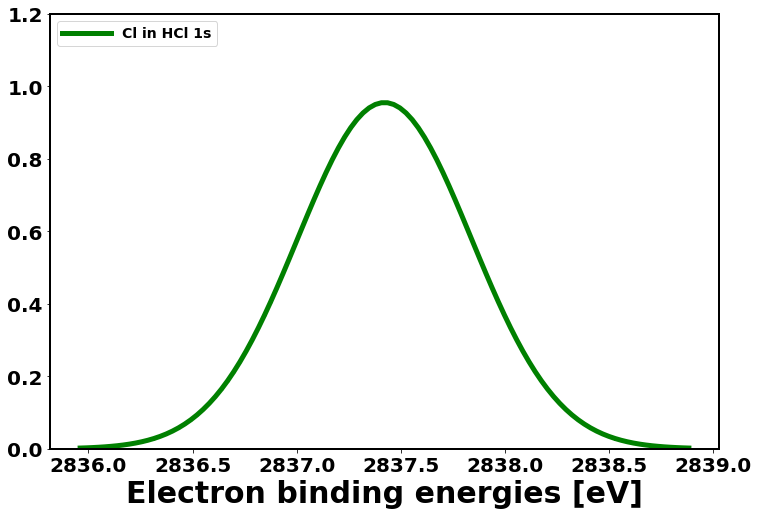

In [364]:
#HCl adsorbed on ice, one water molecule added to the HCl : 1s with ccsd x2camf and acv3z basis set

Embedded_one_water_1s_hcl_acv3z_x2camf = df.Embedded_one_water_1s_hcl_acv3z_x2camf

Embedded_one_water_1s_hcl_acv3z_x2camf = np.array(Embedded_one_water_1s_hcl_acv3z_x2camf)
print(Embedded_one_water_1s_hcl_acv3z_x2camf)

mean_Embedded_one_water_1s_hcl_acv3z_x2camf = np.mean(Embedded_one_water_1s_hcl_acv3z_x2camf)
print("mean_Embedded_one_water_1s_hcl_acv3z_x2camf =", mean_Embedded_one_water_1s_hcl_acv3z_x2camf)



std_Embedded_one_water_1s_hcl_acv3z_x2camf  = np.std(Embedded_one_water_1s_hcl_acv3z_x2camf)
print("std_Embedded_one_water_1s_hcl_acv3z_x2camf =", std_Embedded_one_water_1s_hcl_acv3z_x2camf)


Embedded_one_water_1s_hcl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_1s_hcl_acv3z_x2camf - 3.5*std_Embedded_one_water_1s_hcl_acv3z_x2camf, mean_Embedded_one_water_1s_hcl_acv3z_x2camf + 3.5*std_Embedded_one_water_1s_hcl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_1s_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_1s_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_1s_hcl_acv3z_x2camf, std_Embedded_one_water_1s_hcl_acv3z_x2camf), color="green", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 1s', linewidth=5)

plt.ylim([0.0, 1.2])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-1water_ccsd-1s.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


[279.3367834 280.025949  279.8530966 280.2524768 280.5229166 279.1687677
 279.8776619 280.6252509 279.6241879 279.9315788 280.2842459 279.4871786
 279.4903462 280.3604111 280.1942716 279.6770482 279.8776619 279.5043901
 279.6265234 279.8408786 280.3329264 280.3194425 280.6242324 279.73535
 280.4211417]
mean_Embedded_one_water_2s_hcl_acv3z_x2camf = 279.959788728
std_Embedded_one_water_2s_hcl_acv3z_x2camf = 0.4075514792654437


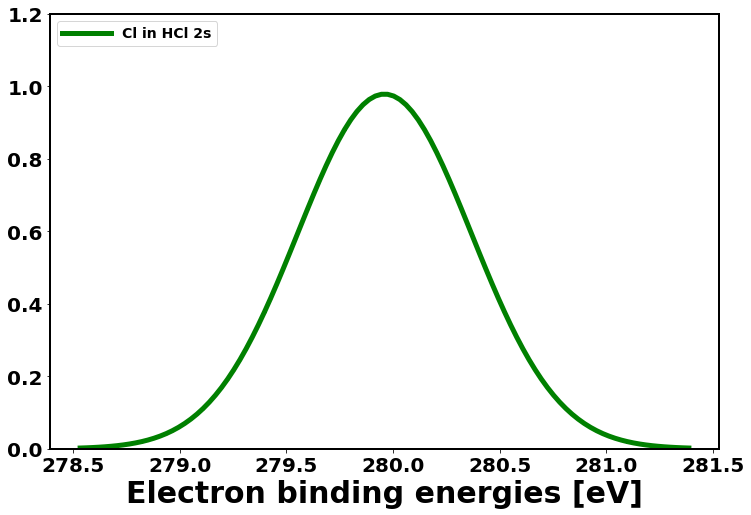

In [365]:
#HCl adsorbed on ice, one water molecule added to the HCl : 2s with ccsd x2camf and acv3z basis set

Embedded_one_water_2s_hcl_acv3z_x2camf = df.Embedded_one_water_2s_hcl_acv3z_x2camf

Embedded_one_water_2s_hcl_acv3z_x2camf = np.array(Embedded_one_water_2s_hcl_acv3z_x2camf)
print(Embedded_one_water_2s_hcl_acv3z_x2camf)

mean_Embedded_one_water_2s_hcl_acv3z_x2camf = np.mean(Embedded_one_water_2s_hcl_acv3z_x2camf)
print("mean_Embedded_one_water_2s_hcl_acv3z_x2camf =", mean_Embedded_one_water_2s_hcl_acv3z_x2camf)


std_Embedded_one_water_2s_hcl_acv3z_x2camf  = np.std(Embedded_one_water_2s_hcl_acv3z_x2camf)
print("std_Embedded_one_water_2s_hcl_acv3z_x2camf =", std_Embedded_one_water_2s_hcl_acv3z_x2camf)


Embedded_one_water_2s_hcl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_2s_hcl_acv3z_x2camf - 3.5*std_Embedded_one_water_2s_hcl_acv3z_x2camf, mean_Embedded_one_water_2s_hcl_acv3z_x2camf + 3.5*std_Embedded_one_water_2s_hcl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_2s_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_2s_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_2s_hcl_acv3z_x2camf, std_Embedded_one_water_2s_hcl_acv3z_x2camf), color="green", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2s', linewidth=5)

plt.ylim([0.0, 1.2])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-1water_ccsd-2s.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


[208.1643292 208.1999623 208.2355954 208.2712284 208.3068615 208.3424946
 208.3781276 208.4137607 208.4493938 208.4850268 208.5206599 208.556293
 208.591926  208.6275591 208.6631922 208.6988253 208.7344583 208.7700914
 208.8057245 208.8413575 208.8769906 208.9126237 208.9482567 208.9838898
 209.0195229]
mean_Embedded_one_water_p_hcl_acv3z_x2camf = 208.59192604800003
std_Embedded_one_water_p_hcl_acv3z_x2camf= 0.25695371531799255


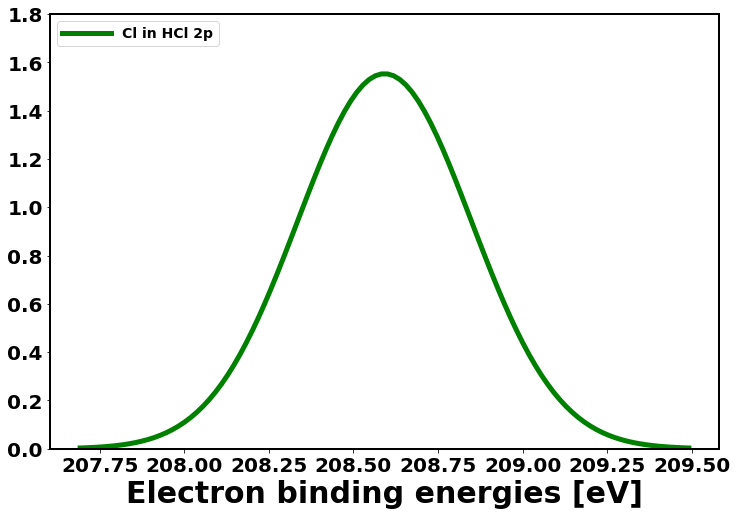

In [366]:
#HCl adsorbed on ice, one water molecule added to the HCl : 2p with ccsd x2camf and acv3z basis set

Embedded_one_water_p_hcl_acv3z_x2camf = df.Embedded_one_water_p_hcl_acv3z_x2camf

Embedded_one_water_p_hcl_acv3z_x2camf = np.array(Embedded_one_water_p_hcl_acv3z_x2camf)
print(Embedded_one_water_p_hcl_acv3z_x2camf)

mean_Embedded_one_water_p_hcl_acv3z_x2camf= np.mean(Embedded_one_water_p_hcl_acv3z_x2camf)
print("mean_Embedded_one_water_p_hcl_acv3z_x2camf =", mean_Embedded_one_water_p_hcl_acv3z_x2camf)


std_Embedded_one_water_p_hcl_acv3z_x2camf = np.std(Embedded_one_water_p_hcl_acv3z_x2camf)
print("std_Embedded_one_water_p_hcl_acv3z_x2camf=", std_Embedded_one_water_p_hcl_acv3z_x2camf)


Embedded_one_water_p_hcl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_p_hcl_acv3z_x2camf - 3.5*std_Embedded_one_water_p_hcl_acv3z_x2camf, mean_Embedded_one_water_p_hcl_acv3z_x2camf + 3.5*std_Embedded_one_water_p_hcl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_p_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_p_hcl_acv3z_x2camf, std_Embedded_one_water_p_hcl_acv3z_x2camf), color="green", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2p', linewidth=5)

plt.ylim([0.0, 1.8])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-1water_ccsd-2p.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


[208.7936417 209.4800372 209.3071886 209.7053557 209.9797743 208.6270105
 209.3314254 210.0784025 209.0799977 209.3914077 209.7396503 208.9415892
 208.9488861 209.8136982 209.6407394 209.1352913 209.9727958 208.9638095
 209.0816187 209.2924702 209.7876413 209.770771  210.0779872 209.1837108
 209.8735804]
mean_Embedded_one_water_p12_hcl_acv3z_x2camf = 209.43993922800001
std_Embedded_one_water_p12_hcl_acv3z_x2camf= 0.4202399761697674


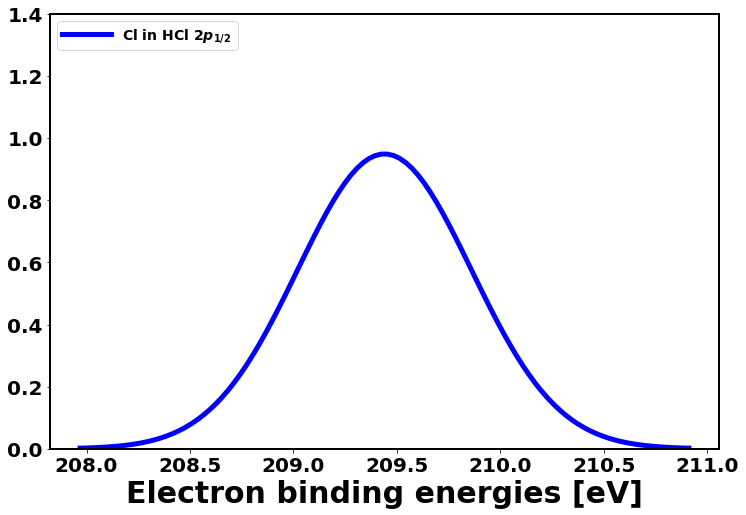

In [367]:
#HCl adsorbed on ice, one water molecule added to the HCl : 2p1/2 with ccsd x2camf and acv3z basis set

Embedded_one_water_p12_hcl_acv3z_x2camf = df.Embedded_one_water_p12_hcl_acv3z_x2camf

Embedded_one_water_p12_hcl_acv3z_x2camf = np.array(Embedded_one_water_p12_hcl_acv3z_x2camf)
print(Embedded_one_water_p12_hcl_acv3z_x2camf)

mean_Embedded_one_water_p12_hcl_acv3z_x2camf= np.mean(Embedded_one_water_p12_hcl_acv3z_x2camf)
print("mean_Embedded_one_water_p12_hcl_acv3z_x2camf =", mean_Embedded_one_water_p12_hcl_acv3z_x2camf)


std_Embedded_one_water_p12_hcl_acv3z_x2camf = np.std(Embedded_one_water_p12_hcl_acv3z_x2camf)
print("std_Embedded_one_water_p12_hcl_acv3z_x2camf=", std_Embedded_one_water_p12_hcl_acv3z_x2camf)


Embedded_one_water_p12_hcl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_p12_hcl_acv3z_x2camf - 3.5*std_Embedded_one_water_p12_hcl_acv3z_x2camf, mean_Embedded_one_water_p12_hcl_acv3z_x2camf + 3.5*std_Embedded_one_water_p12_hcl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_p12_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p12_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_p12_hcl_acv3z_x2camf, std_Embedded_one_water_p12_hcl_acv3z_x2camf), color="blue", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2$p_{1/2}$', linewidth=5)

plt.ylim([0.0, 1.4])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-1water_ccsd-2p12.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


[207.135107  207.7828504 207.6097577 208.0075707 208.2826372 206.9298876
 207.633817  208.3806232 207.3825659 207.6946072 208.0425532 207.2442722
 207.2518259 208.1164966 207.9415953 207.4382181 208.2743989 207.2669854
 207.3843734 207.5943544 208.089841  208.0727258 208.3802104 207.4849472
 208.1756004]
mean_Embedded_one_water_p32_hcl_acv3z_x2camf = 207.74391288400003
std_Embedded_one_water_p32_hcl_acv3z_x2camf= 0.41770655068484375


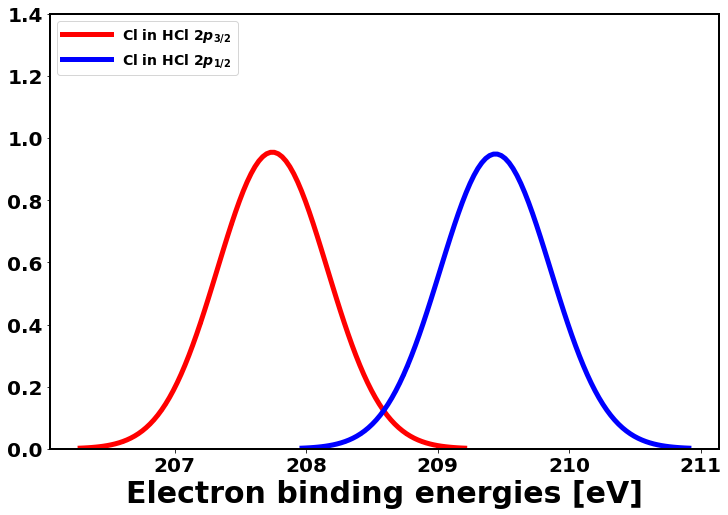

In [368]:
#HCl adsorbed on ice, one water molecule added to the HCl : 2p3/2 with ccsd x2camf and acv3z basis set

Embedded_one_water_p32_hcl_acv3z_x2camf = df.Embedded_one_water_p32_hcl_acv3z_x2camf

Embedded_one_water_p32_hcl_acv3z_x2camf = np.array(Embedded_one_water_p32_hcl_acv3z_x2camf)
print(Embedded_one_water_p32_hcl_acv3z_x2camf)

mean_Embedded_one_water_p32_hcl_acv3z_x2camf= np.mean(Embedded_one_water_p32_hcl_acv3z_x2camf)
print("mean_Embedded_one_water_p32_hcl_acv3z_x2camf =", mean_Embedded_one_water_p32_hcl_acv3z_x2camf)


std_Embedded_one_water_p32_hcl_acv3z_x2camf = np.std(Embedded_one_water_p32_hcl_acv3z_x2camf)
print("std_Embedded_one_water_p32_hcl_acv3z_x2camf=", std_Embedded_one_water_p32_hcl_acv3z_x2camf)


Embedded_one_water_p32_hcl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_p32_hcl_acv3z_x2camf - 3.5*std_Embedded_one_water_p32_hcl_acv3z_x2camf, mean_Embedded_one_water_p32_hcl_acv3z_x2camf + 3.5*std_Embedded_one_water_p32_hcl_acv3z_x2camf, 100)

plt.figure(figsize=(12,8))

plt.ticklabel_format(useOffset=False)

plt.plot(Embedded_one_water_p32_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p32_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_p32_hcl_acv3z_x2camf, std_Embedded_one_water_p32_hcl_acv3z_x2camf), color="red", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2$p_{3/2}$', linewidth=5)
plt.plot(Embedded_one_water_p12_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p12_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_p12_hcl_acv3z_x2camf, std_Embedded_one_water_p12_hcl_acv3z_x2camf), color="blue", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2$p_{1/2}$', linewidth=5)

plt.ylim([0.0, 1.4])
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')
plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-1water_ccsd-2p12.png', bbox_inches='tight', dpi=400)

plt.show()
plt.close()


In [369]:
#HCl adsorbed on ice, one water molecule added to the HCl : 2p1/2 and 2p3/2 with ccsd x2camf and acv3z basis set

#var_Embedded_one_water_p12_hcl_acv3z_x2camf = np.var(Embedded_one_water_p12_hcl_acv3z_x2camf)
#print("var_Embedded_one_water_p12_hcl_acv3z_x2camf =", var_Embedded_one_water_p12_hcl_acv3z_x2camf)

#var_Embedded_one_water_p32_hcl_acv3z_x2camf = np.var(Embedded_one_water_p32_hcl_acv3z_x2camf)
#print("var_Embedded_one_water_p32_hcl_acv3z_x2camf =", var_Embedded_one_water_p32_hcl_acv3z_x2camf)

#sigma_Embedded_one_water_p12_hcl_acv3z_x2camf = np.sqrt(var_Embedded_one_water_p12_hcl_acv3z_x2camf )
#print("sigma_Embedded_one_water_p12_hcl_acv3z_x2camf=", sigma_Embedded_one_water_p12_hcl_acv3z_x2camf)

#sigma_Embedded_one_water_p32_hcl_acv3z_x2camf = np.sqrt(var_Embedded_one_water_p32_hcl_acv3z_x2camf )
#print("sigma_Embedded_one_water_p32_hcl_acv3z_x2camf=", sigma_Embedded_one_water_p32_hcl_acv3z_x2camf)

#Embedded_one_water_p12_hcl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_p12_hcl_acv3z_x2camf - 3.5*sigma_Embedded_one_water_p12_hcl_acv3z_x2camf, mean_Embedded_one_water_p12_hcl_acv3z_x2camf + 3.5*sigma_Embedded_one_water_p12_hcl_acv3z_x2camf, 100)
#Embedded_one_water_p32_hcl_acv3z_x2camf_BE = np.linspace(mean_Embedded_one_water_p32_hcl_acv3z_x2camf - 3.5*sigma_Embedded_one_water_p32_hcl_acv3z_x2camf, mean_Embedded_one_water_p32_hcl_acv3z_x2camf + 3.5*sigma_Embedded_one_water_p32_hcl_acv3z_x2camf, 100)

#plt.figure(figsize=(12,8))

#plt.ticklabel_format(useOffset=False)


#plt.plot(Embedded_one_water_p12_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p12_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_p12_hcl_acv3z_x2camf, sigma_Embedded_one_water_p12_hcl_acv3z_x2camf), color="blue", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2$p_{1/2}$', linewidth=5)
#plt.plot(Embedded_one_water_p32_hcl_acv3z_x2camf_BE, scipy.stats.norm.pdf(Embedded_one_water_p32_hcl_acv3z_x2camf_BE, mean_Embedded_one_water_p32_hcl_acv3z_x2camf, sigma_Embedded_one_water_p32_hcl_acv3z_x2camf), color="red", marker='>', markersize=2, linestyle='solid',label='Cl in HCl 2$p_{3/2}$', linewidth=5)

#plt.ylim([0.0, 1.4])
#plt.xticks(fontsize=20, fontweight='bold')
#plt.yticks(fontsize=20, fontweight='bold')
#plt.legend(loc=2, prop={'size': 14}, handlelength=3.5)
#plt.xlabel('Electron binding energies [eV]', fontsize=30, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=20, fontweight='bold')

#plt.savefig('hcl_in_ice_50-1water_ccsd-2p12.png', bbox_inches='tight', dpi=400)

#plt.show()
#plt.close()


In [370]:
#df = pd.read_excel('snap-hcl50-1-ccsd-3z.xlsx', skiprows=3)
#df.head()

#hclp12meanstd = df.hclp12meanstd

#hclp32meanstd = df.hclp32meanstd


#hcl2p12avev = df.hcl2p12avev
#print(hcl2p12avev)

#hcl2p32avev = df.hcl2p32avev
#print(hcl2p32avev)    



In [371]:
#Gasphase_hcl_p12 = np.array(hcl2p12avev)
#Gasphase_hcl_p32 = np.array(hcl2p32avev)
#print(Gasphase_hcl_p12)
#print(Gasphase_hcl_p32)

#adjust_for_spin_orbit = []

#for i in Gasphase_hcl_p32:
#    i+=1.67
#    adjust_for_spin_orbit.append(i)
#print("mean_adjust_for_spin_orbit=", adjust_for_spin_orbit)


In [372]:
#mean_hcl2p12avev = np.mean(Gasphase_hcl_p12)
#print(mean_hcl2p12avev)
#mean_hcl2p32avev = np.mean(Gasphase_hcl_p32)
#print(mean_hcl2p32avev)


#var_hcl2p12avev = np.var(Gasphase_hcl_p12)
#print(var_hcl2p12avev)
#var_hcl2p32avev = np.var(Gasphase_hcl_p32)
#print(var_hcl2p32avev)

#sigma_hcl2p12avev = np.sqrt(var_hcl2p12avev)
#print(sigma_hcl2p12avev)
#sigma_hcl2p32avev = np.sqrt(var_hcl2p32avev)
#print(sigma_hcl2p32avev)

#std_hcl2p12avev = np.std(Gasphase_hcl_p12)
#print(std_hcl2p12avev)
#std_hcl2p32avev = np.std(Gasphase_hcl_p32)
#print(std_hcl2p32avev)



#mean_adjust_for_spin_orbit = np.mean(adjust_for_spin_orbit)
#var_adjust_for_spin_orbit = np.var(adjust_for_spin_orbit)
#sigma_adjust_for_spin_orbit = np.sqrt(var_adjust_for_spin_orbit)
#print(mean_adjust_for_spin_orbit )
#print(var_adjust_for_spin_orbit )
#print(sigma_adjust_for_spin_orbit )


In [373]:
#x_12 = np.linspace(mean_hcl2p12avev - 3.5*sigma_hcl2p12avev , mean_hcl2p12avev + 3.5*sigma_hcl2p12avev, 100)
#print(x_12)

#x_32 = np.linspace(mean_hcl2p32avev - 3.5*sigma_hcl2p32avev , mean_hcl2p32avev + 3.5*sigma_hcl2p32avev, 100)
#print(x_32)

#spin_x_12 =  np.linspace(mean_adjust_for_spin_orbit - 3.5*sigma_adjust_for_spin_orbit, mean_adjust_for_spin_orbit + 3.5*sigma_adjust_for_spin_orbit, 100)
#print(spin_x_12)


#plt.ticklabel_format(useOffset=False)

#plt.plot(x_12, scipy.stats.norm.pdf(x_12, mean_hcl2p12avev, sigma_hcl2p12avev))

#plt.show()

In [374]:
#plt.ticklabel_format(useOffset=False)

#plt.plot(x_32, scipy.stats.norm.pdf(x_32, mean_hcl2p32avev, sigma_hcl2p32avev))

#plt.bar(x_32, scipy.stats.norm.pdf(x_32, mean_hcl2p32avev, sigma_hcl2p32avev), width=0.00024, color='b', align='center')
#plt.show()

In [375]:
#plt.figure(figsize=(12,10))

#plt.ticklabel_format(useOffset=False)

#plt.ylim([0, 160])
#plt.xticks(fontsize=20, fontweight='bold')
#plt.yticks(fontsize=20, fontweight='bold')
#Gender=['Cl in HCl 2$p_{3/2}$', 'Cl in HCl 2$p_{1/2}$']
#plt.legend(Gender,loc=2, prop={'size': 18}, handlelength=5)
#plt.ylim([500, 1000])
#plt.xlabel('Electron binding energies [eV]', fontsize=20, fontweight='bold')
#plt.ylabel('Normalized distribution', fontsize=25, fontweight='bold')


#plt.plot(x_12, scipy.stats.norm.pdf(x_12, mean_hcl2p12avev, sigma_hcl2p12avev))
#plt.plot(spin_x_12, scipy.stats.norm.pdf(spin_x_12, mean_adjust_for_spin_orbit, sigma_adjust_for_spin_orbit))


#plt.plot(x_32, scipy.stats.norm.pdf(x_32, mean_hcl2p32avev, sigma_hcl2p32avev))
#plt.show()